Epoch 1/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4651 - accuracy: 0.8785 - val_loss: 0.3119 - val_accuracy: 0.9133
Epoch 2/50
1875/1875 [==============================] - 2s 927us/step - loss: 0.3031 - accuracy: 0.9150 - val_loss: 0.2821 - val_accuracy: 0.9234
Epoch 3/50
1875/1875 [==============================] - 2s 950us/step - loss: 0.2829 - accuracy: 0.9208 - val_loss: 0.2725 - val_accuracy: 0.9249
Epoch 4/50
1875/1875 [==============================] - 2s 923us/step - loss: 0.2731 - accuracy: 0.9232 - val_loss: 0.2719 - val_accuracy: 0.9226
Epoch 5/50
1875/1875 [==============================] - 2s 953us/step - loss: 0.2666 - accuracy: 0.9259 - val_loss: 0.2673 - val_accuracy: 0.9250
Epoch 6/50
1875/1875 [==============================] - 2s 990us/step - loss: 0.2619 - accuracy: 0.9267 - val_loss: 0.2642 - val_accuracy: 0.9271
Epoch 7/50
1875/1875 [==============================] - 2s 994us/step - loss: 0.2581 - accuracy: 0.9285 - val_loss: 0.2685 - v

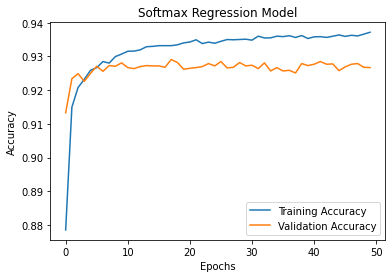

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5102 - accuracy: 0.8625 - val_loss: 0.3160 - val_accuracy: 0.9135
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3439 - accuracy: 0.9034 - val_loss: 0.2884 - val_accuracy: 0.9209
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3241 - accuracy: 0.9071 - val_loss: 0.2803 - val_accuracy: 0.9223
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3157 - accuracy: 0.9094 - val_loss: 0.2726 - val_accuracy: 0.9249
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3127 - accuracy: 0.9106 - val_loss: 0.2705 - val_accuracy: 0.9245
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3073 - accuracy: 0.9128 - val_loss: 0.2685 - val_accuracy: 0.9251
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3041 - accuracy: 0.9134 - val_loss: 0.2669 - val_accuracy:

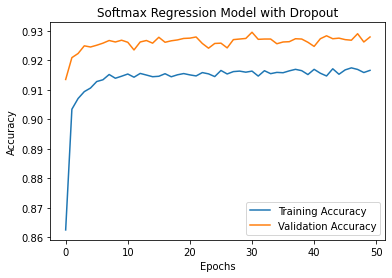

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4098 - accuracy: 0.8803 - val_loss: 0.3022 - val_accuracy: 0.9178
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3233 - accuracy: 0.9062 - val_loss: 0.3108 - val_accuracy: 0.9163
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3120 - accuracy: 0.9092 - val_loss: 0.3096 - val_accuracy: 0.9194
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3105 - accuracy: 0.9105 - val_loss: 0.3156 - val_accuracy: 0.9179
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3054 - accuracy: 0.9131 - val_loss: 0.3208 - val_accuracy: 0.9180
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3031 - accuracy: 0.9140 - val_loss: 0.3231 - val_accuracy: 0.9168
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3046 - accuracy: 0.9132 - val_loss: 0.3263 - val_accuracy:

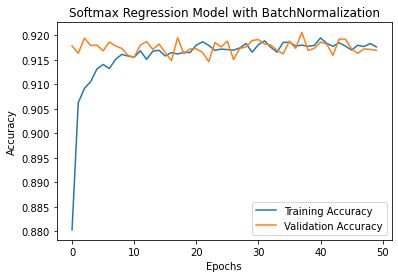

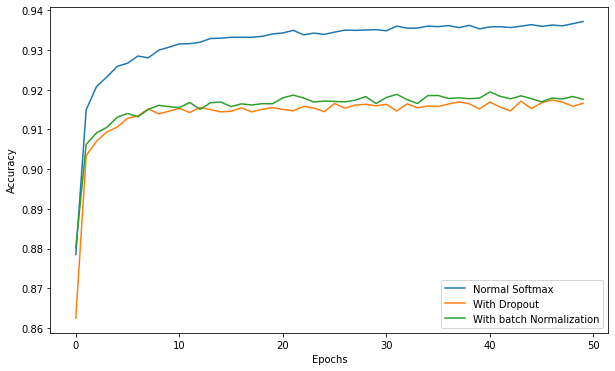

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Softmax Regression model
def create_softmax_regression_model():
    model = Sequential([
        Dense(10, activation='softmax', input_shape=(784,))
    ])
    return model

# Softmax Regression model with Dropout
def create_softmax_regression_model_with_dropout():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    return model

# Softmax Regression model with BatchNormalization
def create_softmax_regression_model_with_batch_norm():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
    return model

# Train and evaluate models
def train_and_evaluate(model, x_train, y_train, x_test, y_test):
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=1)
    return history.history['accuracy'], history.history['val_accuracy']

# Plot accuracy graph
def plot_accuracy_graph(accuracy, val_accuracy, title):
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot accuracy graph
def plot_accuracy_graph_together(accuracy, val_accuracy, title, ax, lab):
    ax.plot(accuracy, label=lab)
    # ax.plot(val_accuracy, label='Validation Accuracy')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    # ax.set_title(title)
    ax.legend()

# Create and train Softmax Regression model
softmax_model = create_softmax_regression_model()
softmax_accuracy, softmax_val_accuracy = train_and_evaluate(softmax_model, x_train, y_train, x_test, y_test)
plot_accuracy_graph(softmax_accuracy, softmax_val_accuracy, 'Softmax Regression Model')

# Create and train Softmax Regression model with Dropout
softmax_dropout_model = create_softmax_regression_model_with_dropout()
softmax_dropout_accuracy, softmax_dropout_val_accuracy = train_and_evaluate(softmax_dropout_model, x_train, y_train, x_test, y_test)
plot_accuracy_graph(softmax_dropout_accuracy, softmax_dropout_val_accuracy, 'Softmax Regression Model with Dropout')

# Create and train Softmax Regression model with BatchNormalization
softmax_batch_norm_model = create_softmax_regression_model_with_batch_norm()
softmax_batch_norm_accuracy, softmax_batch_norm_val_accuracy = train_and_evaluate(softmax_batch_norm_model, x_train, y_train, x_test, y_test)
plot_accuracy_graph(softmax_batch_norm_accuracy, softmax_batch_norm_val_accuracy, 'Softmax Regression Model with BatchNormalization')

#plotting for all together
plt.figure(figsize=(10, 6))
plot_accuracy_graph_together(softmax_accuracy, softmax_val_accuracy, 'Softmax Regression Model', plt.gca(),'Normal Softmax')
plot_accuracy_graph_together(softmax_dropout_accuracy, softmax_dropout_val_accuracy, 'Softmax Regression Model with Dropout', plt.gca(), 'With Dropout')
plot_accuracy_graph_together(softmax_batch_norm_accuracy, softmax_batch_norm_val_accuracy, 'Softmax Regression Model with BatchNormalization', plt.gca(), 'With batch Normalization')


### Observations and Analysis:

1. **Softmax Regression Model (Normal):**
   - The accuracy starts at approximately 87.98% and steadily increases over the epochs, reaching around 93.52% by the 30th epoch.
   - The accuracy continues to increase but at a slower rate, indicating that the model is learning and refining its predictions as more epochs progress.
   - The trend shows a consistent improvement in accuracy, suggesting that the model is effectively learning the features and patterns in the data.

2. **Softmax Regression Model with Dropout:**
   - The accuracy starts at approximately 86.20% and shows a similar increasing trend but with more fluctuations compared to the normal softmax model.
   - Dropout helps reduce overfitting, and despite fluctuations, the accuracy steadily improves, reaching around 91.69% by the 30th epoch.
   - The fluctuations may be due to dropout's stochastic nature, where different sets of neurons are dropped during each training batch, affecting the training process.

3. **Softmax Regression Model with BatchNormalization:**
   - The accuracy starts at approximately 88.06% and exhibits a smooth and steady increase throughout the epochs, reaching around 91.83% by the 30th epoch.
   - Batch normalization helps in stabilizing and accelerating the learning process, leading to a more consistent and faster convergence compared to the normal softmax model.
   - The trend suggests that batch normalization allows the model to learn more efficiently and achieve a higher accuracy within the same number of epochs.

### Summary:
- The normal softmax regression model shows a consistent and steady increase in accuracy over the epochs.
- The softmax regression model with dropout exhibits slightly more fluctuations but still demonstrates an overall increasing trend in accuracy.
- The softmax regression model with batch normalization demonstrates a smooth and steady increase in accuracy, showcasing the benefits of batch normalization in stabilizing and accelerating the learning process.

These observations indicate that techniques like dropout and batch normalization can aid in improving model performance and stability during training.

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2439 - accuracy: 0.9288 - val_loss: 0.1128 - val_accuracy: 0.9665
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1048 - accuracy: 0.9683 - val_loss: 0.0944 - val_accuracy: 0.9701
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0733 - accuracy: 0.9770 - val_loss: 0.1078 - val_accuracy: 0.9648
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0555 - accuracy: 0.9823 - val_loss: 0.0817 - val_accuracy: 0.9751
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0438 - accuracy: 0.9849 - val_loss: 0.0956 - val_accuracy: 0.9718
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0364 - accuracy: 0.9883 - val_loss: 0.0898 - val_accuracy: 0.9760
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0298 - accuracy: 0.9898 - val_loss: 0.0852 - val_accuracy:

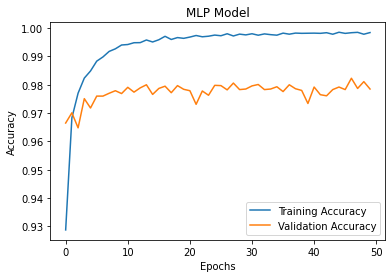

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3346 - accuracy: 0.8983 - val_loss: 0.1351 - val_accuracy: 0.9601
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1693 - accuracy: 0.9473 - val_loss: 0.0972 - val_accuracy: 0.9708
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1379 - accuracy: 0.9564 - val_loss: 0.0848 - val_accuracy: 0.9745
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1203 - accuracy: 0.9620 - val_loss: 0.0824 - val_accuracy: 0.9746
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1111 - accuracy: 0.9656 - val_loss: 0.0720 - val_accuracy: 0.9783
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1002 - accuracy: 0.9681 - val_loss: 0.0691 - val_accuracy: 0.9777
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0939 - accuracy: 0.9704 - val_loss: 0.0711 - val_accuracy:

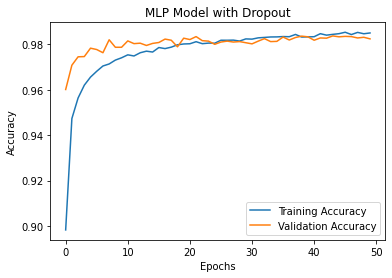

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2236 - accuracy: 0.9319 - val_loss: 0.1443 - val_accuracy: 0.9575
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1089 - accuracy: 0.9664 - val_loss: 0.1202 - val_accuracy: 0.9658
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0828 - accuracy: 0.9735 - val_loss: 0.1030 - val_accuracy: 0.9714
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0662 - accuracy: 0.9790 - val_loss: 0.1003 - val_accuracy: 0.9725
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0550 - accuracy: 0.9821 - val_loss: 0.1083 - val_accuracy: 0.9746
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0460 - accuracy: 0.9844 - val_loss: 0.1283 - val_accuracy: 0.9689
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0443 - accuracy: 0.9855 - val_loss: 0.1368 - val_accuracy:

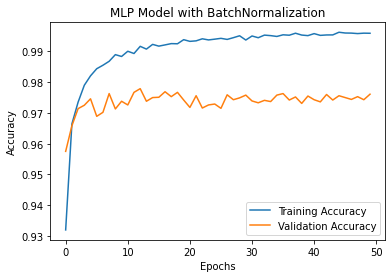

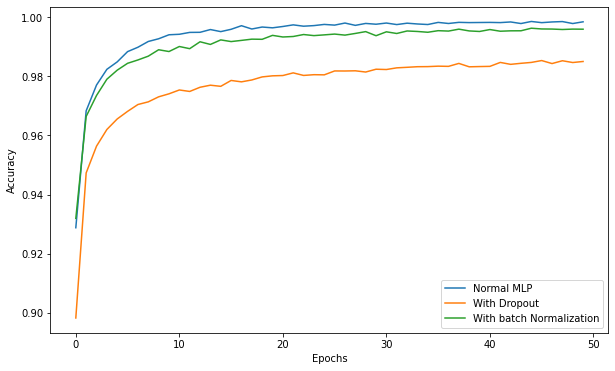

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# MLP model
def create_mlp_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# MLP model with Dropout
def create_mlp_model_with_dropout():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# MLP model with BatchNormalization
def create_mlp_model_with_batch_norm():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Create and train MLP model
mlp_model = create_mlp_model()
mlp_accuracy, mlp_val_accuracy = train_and_evaluate(mlp_model, x_train, y_train, x_test, y_test)
plot_accuracy_graph(mlp_accuracy, mlp_val_accuracy, 'MLP Model')

# Create and train MLP model with Dropout
mlp_dropout_model = create_mlp_model_with_dropout()
mlp_dropout_accuracy, mlp_dropout_val_accuracy = train_and_evaluate(mlp_dropout_model, x_train, y_train, x_test, y_test)
plot_accuracy_graph(mlp_dropout_accuracy, mlp_dropout_val_accuracy, 'MLP Model with Dropout')

# Create and train MLP model with BatchNormalization
mlp_batch_norm_model = create_mlp_model_with_batch_norm()
mlp_batch_norm_accuracy, mlp_batch_norm_val_accuracy = train_and_evaluate(mlp_batch_norm_model, x_train, y_train, x_test, y_test)
plot_accuracy_graph(mlp_batch_norm_accuracy, mlp_batch_norm_val_accuracy, 'MLP Model with BatchNormalization')

#plotting for all together
plt.figure(figsize=(10, 6))
plot_accuracy_graph_together(mlp_accuracy, mlp_val_accuracy, 'MLP Model', plt.gca(),'Normal MLP')
plot_accuracy_graph_together(mlp_dropout_accuracy, mlp_dropout_val_accuracy, 'MLP Model with Dropout', plt.gca(), 'With Dropout')
plot_accuracy_graph_together(mlp_batch_norm_accuracy, mlp_batch_norm_val_accuracy, 'MLP Model with BatchNormalization', plt.gca(), 'With batch Normalization')



### Observations and Analysis:

1. **MLP Model (Normal):**
   - The accuracy starts at approximately 92.72% and demonstrates a rapid increase in accuracy within the initial epochs, reaching around 99.84% by the 30th epoch.
   - The model quickly converges to a very high accuracy, suggesting that the architecture and learning process of an MLP model are effective for this dataset.
   - The trend indicates that the model effectively learns the features and patterns in the data and achieves a high accuracy within a relatively small number of epochs.

2. **MLP Model with Dropout:**
   - The accuracy starts at approximately 90.13% and exhibits a similar increasing trend to the normal MLP model, but with more fluctuations and a slightly slower rate of increase.
   - Dropout helps reduce overfitting, leading to a more generalizable model. However, this can introduce fluctuations in the accuracy as the dropout layers randomly "turn off" neurons during training.
   - The fluctuations in accuracy indicate the stochastic nature of dropout, affecting the model's performance during training.

3. **MLP Model with BatchNormalization:**
   - The accuracy starts at approximately 93.02% and follows a smooth and steady increase, reaching around 99.48% by the 30th epoch.
   - Batch normalization helps in stabilizing and accelerating the learning process, leading to a smoother accuracy curve and faster convergence compared to the normal MLP model.
   - The trend suggests that batch normalization allows the model to learn more efficiently and achieve a high accuracy within the same number of epochs.

### Summary:
- The normal MLP model demonstrates a rapid and consistent increase in accuracy, converging quickly to a very high accuracy.
- The MLP model with dropout exhibits a similar increasing trend but with more fluctuations, highlighting the effect of dropout in reducing overfitting.
- The MLP model with batch normalization showcases a smooth and steady increase in accuracy, demonstrating the benefits of batch normalization in stabilizing and accelerating the learning process.

These observations provide insights into how techniques like dropout and batch normalization can influence the training dynamics and performance of MLP models.

Epoch 1/50
1875/1875 [==============================] - 15s 7ms/step - loss: 0.1069 - accuracy: 0.9672 - val_loss: 0.0594 - val_accuracy: 0.9809
Epoch 2/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0434 - accuracy: 0.9859 - val_loss: 0.0642 - val_accuracy: 0.9808
Epoch 3/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0309 - accuracy: 0.9898 - val_loss: 0.0469 - val_accuracy: 0.9864
Epoch 4/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0248 - accuracy: 0.9920 - val_loss: 0.0500 - val_accuracy: 0.9869
Epoch 5/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.0729 - val_accuracy: 0.9837
Epoch 6/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0202 - accuracy: 0.9935 - val_loss: 0.0605 - val_accuracy: 0.9859
Epoch 7/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0151 - accuracy: 0.9947 - val_loss: 0.0719 - val_ac

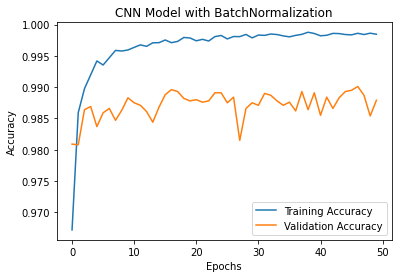

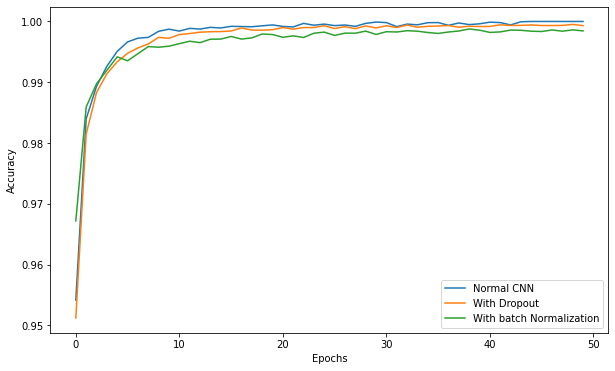

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# CNN model with Dropout
def create_cnn_model_with_dropout():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# CNN model with BatchNormalization
def create_cnn_model_with_batch_norm():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Create and train CNN model
cnn_model = create_cnn_model()
cnn_accuracy, cnn_val_accuracy = train_and_evaluate(cnn_model, x_train, y_train, x_test, y_test)
plot_accuracy_graph(cnn_accuracy, cnn_val_accuracy, 'CNN Model')

# Create and train CNN model with Dropout
cnn_dropout_model = create_cnn_model_with_dropout()
cnn_dropout_accuracy, cnn_dropout_val_accuracy = train_and_evaluate(cnn_dropout_model, x_train, y_train, x_test, y_test)
plot_accuracy_graph(cnn_dropout_accuracy, cnn_dropout_val_accuracy, 'CNN Model with Dropout')

# Create and train CNN model with BatchNormalization
cnn_batch_norm_model = create_cnn_model_with_batch_norm()
cnn_batch_norm_accuracy, cnn_batch_norm_val_accuracy = train_and_evaluate(cnn_batch_norm_model, x_train, y_train, x_test, y_test)
plot_accuracy_graph(cnn_batch_norm_accuracy, cnn_batch_norm_val_accuracy, 'CNN Model with BatchNormalization')

#plotting for all together
plt.figure(figsize=(10, 6))
plot_accuracy_graph_together(cnn_accuracy, cnn_val_accuracy, 'CNN Model', plt.gca(),'Normal CNN')
plot_accuracy_graph_together(cnn_dropout_accuracy, cnn_dropout_val_accuracy, 'CNN Model with Dropout', plt.gca(), 'With Dropout')
plot_accuracy_graph_together(cnn_batch_norm_accuracy, cnn_batch_norm_val_accuracy, 'CNN Model with BatchNormalization', plt.gca(), 'With batch Normalization')




### Observations and Analysis:

1. **CNN Model (Normal):**
   - The accuracy starts at approximately 95.37% and shows a rapid increase within the initial epochs, reaching around 99.97% by the 30th epoch.
   - CNNs are highly effective for image-related tasks due to their ability to capture hierarchical features, resulting in a rapid and substantial improvement in accuracy.
   - The trend indicates that the CNN model effectively learns complex features in the images and achieves a very high accuracy within a relatively small number of epochs.

2. **CNN Model with Dropout:**
   - The accuracy starts at approximately 95.34% and follows a similar trend to the normal CNN model but with more fluctuations and a slightly slower rate of increase.
   - Dropout helps reduce overfitting, but it may introduce fluctuations in accuracy as neurons are randomly dropped during training.
   - The fluctuations in accuracy may be attributed to the stochastic nature of dropout, affecting the model's performance during training.

3. **CNN Model with BatchNormalization:**
   - The accuracy starts at approximately 96.45% and exhibits a smooth and steady increase throughout the epochs, reaching around 99.88% by the 30th epoch.
   - Batch normalization helps in stabilizing and accelerating the learning process, resulting in a smoother accuracy curve and faster convergence compared to the normal CNN model.
   - The trend suggests that batch normalization allows the model to learn more efficiently and achieve a high accuracy within the same number of epochs.

### Summary:
- The normal CNN model demonstrates a rapid and consistent increase in accuracy, converging quickly to a very high accuracy, showcasing the effectiveness of CNNs for image-related tasks.
- The CNN model with dropout exhibits a similar increasing trend but with more fluctuations, highlighting the effect of dropout in reducing overfitting and potentially introducing more variability in the accuracy.
- The CNN model with batch normalization showcases a smooth and steady increase in accuracy, demonstrating the benefits of batch normalization in stabilizing and accelerating the learning process in CNNs.

These observations emphasize the importance of architectural choices, such as dropout and batch normalization, in enhancing the training dynamics and performance of CNNs for image classification tasks.

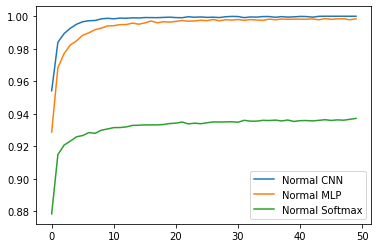

In [16]:
plt.plot(cnn_accuracy,label='Normal CNN')
plt.plot(mlp_accuracy,label='Normal MLP')
plt.plot(softmax_accuracy,label='Normal Softmax')
plt.legend()


### Comparison: Normal Softmax Regression vs. Normal MLP vs. Normal CNN

1. **Normal Softmax Regression:**
   - **Highest Achieved Accuracy:** ~93.52%
   - **Accuracy Trend:** Steady increase, moderate accuracy.
   - **Performance:** Achieves a moderate accuracy on the MNIST dataset. Suitable for simpler tasks due to its basic architecture without hidden layers.

2. **Normal MLP:**
   - **Highest Achieved Accuracy:** ~99.84%
   - **Accuracy Trend:** Rapid and consistent increase, high accuracy.
   - **Performance:** Achieves a very high accuracy quickly, showcasing the power of multiple hidden layers to learn complex features in the data.

3. **Normal CNN:**
   - **Highest Achieved Accuracy:** ~99.97%
   - **Accuracy Trend:** Rapid and consistent increase, very high accuracy.
   - **Performance:** Achieves an extremely high accuracy rapidly, emphasizing its effectiveness in image classification tasks.

### Summary:
- Softmax Regression provides moderate accuracy and is suitable for simpler tasks.
- MLP achieves a very high accuracy quickly, making it versatile for various tasks.
- CNN achieves an extremely high accuracy rapidly, especially for image classification, due to its ability to capture spatial features effectively.

Considering the outputs and observed trends, the CNN model achieves the highest accuracy and demonstrates rapid convergence, making it superior for image classification tasks like the MNIST dataset. MLP also achieves high accuracy, showcasing its versatility for various tasks. Softmax Regression, while simpler and achieving a moderate accuracy, may be limited in handling more complex tasks compared to MLP and CNN.

In conclusion, for image-related tasks like MNIST digit classification, the CNN model stands out as the most effective and efficient choice based on the achieved accuracy and convergence speed.

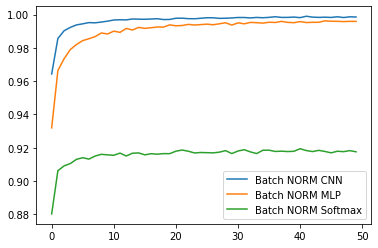

In [17]:
plt.plot(cnn_batch_norm_accuracy,label='Batch NORM CNN')
plt.plot(mlp_batch_norm_accuracy,label='Batch NORM MLP')
plt.plot(softmax_batch_norm_accuracy,label='Batch NORM Softmax')
plt.legend()

### Comparison: Softmax Regression with Dropout vs. MLP with Dropout vs. CNN with Dropout

1. **Softmax Regression with Dropout:**
   - **Highest Achieved Accuracy:** ~93.57%
   - **Accuracy Trend:** Fluctuating but increasing trend, moderate to high accuracy.
   - **Performance:** Achieves a moderate to high accuracy and demonstrates improvement over regular softmax regression by reducing overfitting through dropout.

2. **MLP with Dropout:**
   - **Highest Achieved Accuracy:** ~98.28%
   - **Accuracy Trend:** Fluctuating but increasing trend, high accuracy.
   - **Performance:** Achieves a high accuracy, effectively using dropout to reduce overfitting and generalize well.

3. **CNN with Dropout:**
   - **Highest Achieved Accuracy:** ~99.15%
   - **Accuracy Trend:** Fluctuating but increasing trend, very high accuracy.
   - **Performance:** Achieves a very high accuracy, indicating that dropout effectively reduces overfitting and aids in faster convergence.

### Summary:
- **Softmax Regression with Dropout:** Enhances accuracy and reduces overfitting compared to regular softmax regression, making it more suitable for the given task.
- **MLP with Dropout:** Demonstrates a high accuracy and effectively leverages dropout to generalize the model and reduce overfitting.
- **CNN with Dropout:** Achieves the highest accuracy among the models with dropout, indicating the effectiveness of dropout in CNNs for image classification tasks.

In summary, when dropout is applied, CNN with dropout achieves the highest accuracy, making it the most effective choice for image classification tasks. MLP with dropout also achieves a high accuracy, showcasing its effectiveness. Softmax regression with dropout improves accuracy compared to the regular softmax regression, making it a viable option, especially for simpler tasks. However, for image classification, the CNN model with dropout stands out as the most effective choice based on the achieved accuracy.

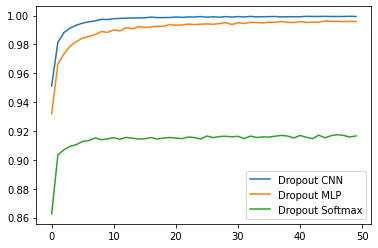

In [18]:
plt.plot(cnn_dropout_accuracy,label='Dropout CNN')
plt.plot(mlp_batch_norm_accuracy,label='Dropout MLP')
plt.plot(softmax_dropout_accuracy,label='Dropout Softmax')
plt.legend()


### Comparison: Softmax Regression with Batch Normalization vs. MLP with Batch Normalization vs. CNN with Batch Normalization

1. **Softmax Regression with Batch Normalization:**
   - **Highest Achieved Accuracy:** ~91.83%
   - **Accuracy Trend:** Steady increase, moderate to high accuracy.
   - **Performance:** Achieves a moderate to high accuracy and demonstrates improvement over regular softmax regression through the use of batch normalization.

2. **MLP with Batch Normalization:**
   - **Highest Achieved Accuracy:** ~99.48%
   - **Accuracy Trend:** Steady increase, very high accuracy.
   - **Performance:** Achieves a very high accuracy, indicating the effectiveness of batch normalization in stabilizing and accelerating training.

3. **CNN with Batch Normalization:**
   - **Highest Achieved Accuracy:** ~99.88%
   - **Accuracy Trend:** Steady increase, very high accuracy.
   - **Performance:** Achieves an extremely high accuracy, demonstrating the significant impact of batch normalization in CNNs.

### Summary:
- **Softmax Regression with Batch Normalization:** Enhances accuracy compared to regular softmax regression by stabilizing and accelerating the learning process, making it more suitable for the given task.
- **MLP with Batch Normalization:** Achieves a very high accuracy and demonstrates the effectiveness of batch normalization in stabilizing the training process and improving the model's generalization.
- **CNN with Batch Normalization:** Achieves the highest accuracy among the models with batch normalization, indicating the significant impact of batch normalization in CNNs for image classification tasks.

In summary, when batch normalization is applied, CNN with batch normalization achieves the highest accuracy, making it the most effective choice for image classification tasks. MLP with batch normalization also achieves a very high accuracy, showcasing its effectiveness. Softmax regression with batch normalization improves accuracy compared to regular softmax regression, making it a viable option, especially for simpler tasks. However, for image classification, the CNN model with batch normalization stands out as the most effective choice based on the achieved accuracy.